In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df = sns.load_dataset('titanic')

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


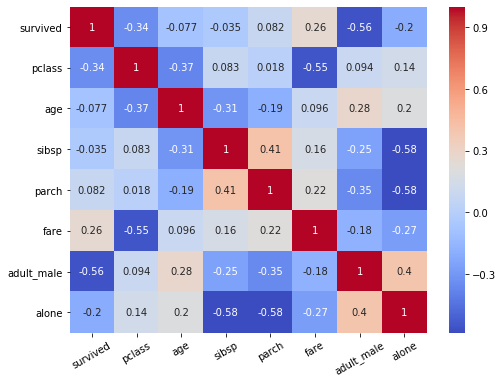

In [6]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.xticks(rotation=30)
plt.show()

There seems to be very little correlation between age and survived.

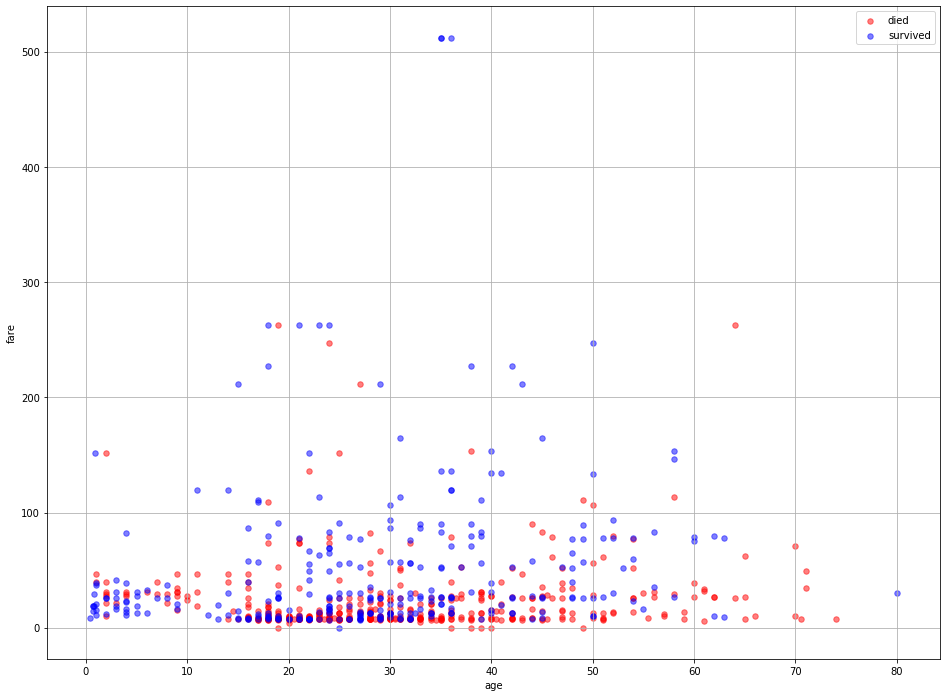

In [7]:
plt.figure(figsize=(16,12))

plt.scatter(df[df['survived'] == 0]['age'], df[df['survived'] == 0]['fare'], 
            s=30, alpha=0.5, c='r', label='died')
plt.scatter(df[df['survived'] == 1]['age'], df[df['survived'] == 1]['fare'], 
            s=30, alpha=0.5, c='b', label='survived')
plt.xlabel('age')
plt.ylabel('fare')
plt.grid()
plt.legend()
plt.show()

It seems that passengers below the age of about 8 years mostly survived.<br>
Also passengers with a higher fare seemed to have a higher chance of surviving.

There are a lot of missing values for the "deck" column.
Let's see if this column is important.

In [8]:
df[df['survived'] == 1].groupby(by='deck').count()['survived']

deck
A     7
B    35
C    35
D    25
E    24
F     8
G     2
Name: survived, dtype: int64

In [9]:
df[df['survived'] == 0].groupby(by='deck').count()['survived']

deck
A     8
B    12
C    24
D     8
E     8
F     5
G     2
Name: survived, dtype: int64

In [10]:
df['deck'] = df['deck'].cat.add_categories('missing').fillna('missing')

In [11]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,missing,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,missing,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,missing,Southampton,no,True


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           891 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [13]:
df = df.dropna()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 15 columns):
survived       712 non-null int64
pclass         712 non-null int64
sex            712 non-null object
age            712 non-null float64
sibsp          712 non-null int64
parch          712 non-null int64
fare           712 non-null float64
embarked       712 non-null object
class          712 non-null category
who            712 non-null object
adult_male     712 non-null bool
deck           712 non-null category
embark_town    712 non-null object
alive          712 non-null object
alone          712 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 70.0+ KB


In [15]:
from sklearn import preprocessing

In [16]:
labelEncorder = preprocessing.LabelEncoder()

In [17]:
labelEncorder.fit_transform(df['sex'])
print(labelEncorder.transform(['male']), labelEncorder.transform(['female']))

[1] [0]


In [18]:
df['sex'] = labelEncorder.transform(df['sex'])

In [19]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,missing,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,missing,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,missing,Southampton,no,True


In [20]:
df.drop(labels=['who', 'adult_male'], axis=1, inplace=True)

In [21]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,missing,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,C,First,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,S,Third,missing,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,S,First,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,S,Third,missing,Southampton,no,True


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 13 columns):
survived       712 non-null int64
pclass         712 non-null int64
sex            712 non-null int64
age            712 non-null float64
sibsp          712 non-null int64
parch          712 non-null int64
fare           712 non-null float64
embarked       712 non-null object
class          712 non-null category
deck           712 non-null category
embark_town    712 non-null object
alive          712 non-null object
alone          712 non-null bool
dtypes: bool(1), category(2), float64(2), int64(5), object(3)
memory usage: 63.8+ KB


In [23]:
classEncoder = preprocessing.OneHotEncoder(sparse=False)

In [24]:
classEncoder.fit(pd.DataFrame(df['class']))
categories = [c + '_class' for c in classEncoder.categories_[0]]
classDf = pd.DataFrame(classEncoder.transform(pd.DataFrame(df['class'])), columns=categories)
classDf.reset_index(drop=True, inplace=True)
classDf.head()

,First_class,Second_class,Third_class
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


In [25]:
df = pd.concat([df, classDf.loc[:, 'Second_class':]], axis=1)
df.drop('class', axis=1, inplace=True)
df.dropna(inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,embark_town,alive,alone,Second_class,Third_class
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,S,missing,Southampton,no,False,0.0,1.0
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,C,C,Cherbourg,yes,False,0.0,0.0
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,S,missing,Southampton,yes,True,0.0,1.0
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,S,C,Southampton,yes,False,0.0,0.0
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,S,missing,Southampton,no,True,0.0,1.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 710
Data columns (total 14 columns):
survived        564 non-null float64
pclass          564 non-null float64
sex             564 non-null float64
age             564 non-null float64
sibsp           564 non-null float64
parch           564 non-null float64
fare            564 non-null float64
embarked        564 non-null object
deck            564 non-null category
embark_town     564 non-null object
alive           564 non-null object
alone           564 non-null object
Second_class    564 non-null float64
Third_class     564 non-null float64
dtypes: category(1), float64(9), object(4)
memory usage: 62.6+ KB


In [27]:
embarkedEncoder = preprocessing.OneHotEncoder(sparse=False)

In [28]:
embarkedEncoder.fit(pd.DataFrame(df['embarked']))
categories = ['emb_' + c for c in embarkedEncoder.categories_[0]]
df =  pd.concat([df, pd.DataFrame(embarkedEncoder.transform(pd.DataFrame(df['embarked'])), 
                                  columns=categories).iloc[:, 1:]], axis=1)
df.drop('embarked', axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,deck,embark_town,alive,alone,Second_class,Third_class,emb_Q,emb_S
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,missing,Southampton,no,False,0.0,1.0,0.0,1.0
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,C,Cherbourg,yes,False,0.0,0.0,0.0,0.0
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,missing,Southampton,yes,True,0.0,1.0,0.0,1.0
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,C,Southampton,yes,False,0.0,0.0,0.0,1.0
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,missing,Southampton,no,True,0.0,1.0,0.0,1.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 15 columns):
survived        564 non-null float64
pclass          564 non-null float64
sex             564 non-null float64
age             564 non-null float64
sibsp           564 non-null float64
parch           564 non-null float64
fare            564 non-null float64
deck            564 non-null category
embark_town     564 non-null object
alive           564 non-null object
alone           564 non-null object
Second_class    564 non-null float64
Third_class     564 non-null float64
emb_Q           564 non-null float64
emb_S           564 non-null float64
dtypes: category(1), float64(11), object(3)
memory usage: 75.8+ KB
